In [3]:
import os
from pprint import pprint
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib import request
import requests

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select

from webdriver_manager.chrome import ChromeDriverManager
import time
from tqdm import tqdm
import pandas as pd

In [12]:
df = pd.read_csv('/Users/zzgr/Desktop/zzgrSandaeteuk/PROJECT GAS STATION/데이터/로우 데이터/한국석유공사 알뜰주유소 현황 20220728.csv', encoding='cp949')
df

,상호,주소,상표,셀프여부
0,도계농협클린주유소,강원 삼척시 도계읍 강원남부로 1818,농협알뜰,Y
1,옥천농협북일지점주유소,전남 해남군 북일면 만월길 11,농협알뜰,N
2,속초농협클린주유소,강원 속초시 동해대로 4198 (교동),농협알뜰,Y
3,용산농협주유소,전남 장흥군 용산면 용안로11,농협알뜰,N
4,장수농협클린주유소,전북 장수군 장수읍 장천로 194,농협알뜰,N
...,...,...,...,...
1290,신덕계클린주유소,경남 양산시 덕명로 48 (덕계동 177-34),자영알뜰,Y
1291,천지주유소,대구 북구 사수로 369,자영알뜰,Y
1292,신성주유소,대전 유성구 가정북로 163,자영알뜰,Y
1293,㈜여정 영암주유소,전남 영암군 삼호읍 대불로 164,자영알뜰,Y


In [5]:
df.columns

Index(['상호', '주소', '상표', '셀프여부'], dtype='object')

In [6]:
df['상표'].unique()

array(['농협알뜰', '고속도로알뜰', '자영알뜰'], dtype=object)

In [7]:
temp = df.groupby(['상표'])['상호'].count()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
temp = pd.DataFrame(temp)
temp = temp.reset_index()
temp

,상표,상호
0,고속도로알뜰,188
1,농협알뜰,671
2,자영알뜰,436


In [247]:
from matplotlib import rc
rc('font', family='AppleGothic')

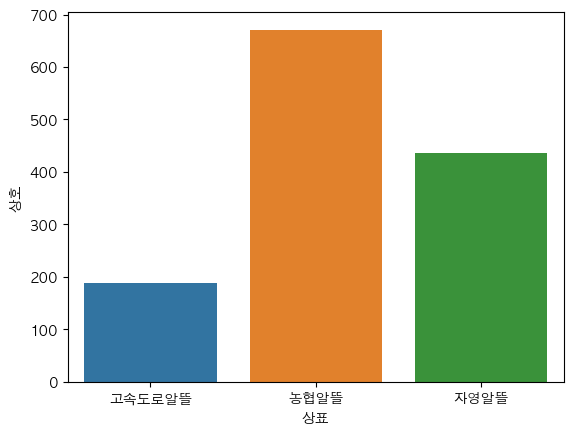

In [24]:
sns.barplot(data=temp, x='상표', y='상호')
plt.show()

In [25]:
import urllib
import datetime
import json

In [285]:
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    pDate = datetime.datetime.strptime(post['pubDate'],'%a, %d %b %Y %H:%M:%S +0900' )
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    jsonResult.append({
                'cnt':cnt, 'title':title, 'description':description
                ,'org_link':org_link, 'link':link, 'pDate':pDate
        })
    return

def getNaverSearch(node,srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + node + ".json"
    parameters = f"?query={urllib.parse.quote(srcText)}&start={start}&display={display}"
    url = base + node + parameters
    responseDecode = getRequestUrl(url)
    if(responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)
    
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id",'nUh0vBVNekTinKV826d_')
    req.add_header("X-Naver-Client-Secret",'HVD5Up28ht')
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"{datetime.datetime.now} url request success")
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print(f"{datetime.datetime.now} error for url : {url}")
    
def main():
    node = 'news' # target
    srcText = input('검색어를 입력하세요')
    cnt = 0
    jsonResult = []
    jsonResponse = getNaverSearch(node, srcText, 1, 100) # start=1, display=100
    total = jsonResponse['total']
   
    while( (jsonResponse != None) and (jsonResponse['display'] != 0) ):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post,jsonResult,cnt)
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)
    filename = 'crawling_api_result.json'
    with open(filename, 'w', encoding='utf-8') as f:
        jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
        f.write(jsonFile)
    print(f'전체 검색: {total}건')
    print(f'가져온 데이터: {cnt}건')         
        

In [284]:
main()

<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
<built-in method now of type object at 0x10787c498> url request success
HTTP Error 400: Bad Request
<built-in method now of type object at 0x10787c498> error for url : https://openapi.naver.com/v1/search/news.json?query=%EC%9C%A4%EC%84%9D%EC%97%B4&start=1001&display=100
전체 검색: 1246131건
가져온 데이터: 1000건


In [157]:
with open('/Users/zzgr/Desktop/zzgrSandaeteuk/PROJECT GAS STATION/crawling_api_result.json') as f:

    raw = json.load(f)

In [158]:
data = pd.DataFrame(raw)

In [178]:
import re

In [165]:
title = [re.sub(r"[^\uAC00-\uD7A30-9·.↓]".strip(), " ", data['title'][i]) for i in range(1000)]


In [211]:
# title = [' '.join(title[i].split()) for i in range(1000)]
data['title'] = title

In [212]:
data

,cnt,description,link,org_link,pDate,title
0,1,전국 휘발유 평균 가격이 리터당 1600원대로 떨어진 가운데 4일 오전 서울시 양천...,https://n.news.naver.com/mnews/article/629/000...,http://news.tf.co.kr/read/photomovie/1969107.htm,2022-10-04 10:49:00,기름값 하락세 1500원대 주유소 등장 포착
1,2,휘발유 가격이 가장 싼 주유소는 경북 칠곡군에 위치한 <b>알뜰주유소</b> 상표의...,https://www.jejutwn.com/news/article.html?no=1...,https://www.jejutwn.com/news/article.html?no=1...,2022-10-04 09:26:00,휘발유·경유 가격비교 10월 4일 기름값 가장 싼 주유소 는
2,3,정부의 지원을 받아 한국석유공사가 석유가격에 대한 소비자 구매부담 경감을 위해 지난...,https://www.wikitree.co.kr/articles/794557,https://www.wikitree.co.kr/articles/794557,2022-10-03 21:16:00,국감 한국석유공사 자영 알뜰주유소 석유사업법 위반행위 143건 적발
3,4,전국에서 휘발유 가격이 제일 낮은 주유소는 경북 칠곡군의 한 <b>알뜰주유소</b>...,http://www.queen.co.kr/news/articleView.html?i...,http://www.queen.co.kr/news/articleView.html?i...,2022-10-03 15:26:00,전국 휘발유 가격 1689원 ... 하락세 당분간 지속
4,5,한국석유공사 유가정보사이트 오피넷에 따르면 전국에서 휘발유가 가장 싼 <b>주유소<...,https://www.gokorea.kr/news/articleView.html?i...,https://www.gokorea.kr/news/articleView.html?i...,2022-10-03 15:00:00,주유소 가격비교 10월 3일 기름값 싼곳 어디 최저가 휘발유 1517원·경유 ...
...,...,...,...,...,...,...
995,996,이어 &quot;정유사에선 2일 내지 3일간 비상운송 계획을 실시해 공급물량을 차질...,http://www.newstomato.com/ReadNews.aspx?no=113...,http://www.newstomato.com/ReadNews.aspx?no=113...,2022-07-01 17:20:00,국민의힘 물가특위 정유사· 주유소 에 유류세 인하분 즉각 반영 요구
996,997,이날 방문은 유류세 추가 인하에 따른 석유시장 동향을 점검하고 유류세 추가 인하분을...,http://www.energydaily.co.kr/news/articleView....,http://www.energydaily.co.kr/news/articleView....,2022-07-01 16:38:00,유류세 추가 인하분 조속 반영하겠다
997,998,이어 &quot;정유사에는 2~3일간 비상운송계획을 실시해 공급물량에 차질이 없도록...,http://www.newsprime.co.kr/news/article.html?n...,http://www.newsprime.co.kr/news/article.html?n...,2022-07-01 16:34:00,유류세 추가 인하 첫날 휘발유·경유 가격 소폭 하락
998,999,"그는 구체적인 유류세 인사 반영과 관련해, &quot;유가를 직영 주유소든, <b>...",https://n.news.naver.com/mnews/article/014/000...,http://www.fnnews.com/news/202207011504242319,2022-07-01 16:33:00,주유소 찾은 물가특위 정유사에 유류세 인하분 즉각 반영요구


In [215]:
description = [re.sub(r"[^\uAC00-\uD7A30-9·.↓]".strip(), " ", data['description'][i]) for i in range(1000)]
description = [' '.join(description[i].split()) for i in range(1000)]
data['description'] = description


In [218]:
data.drop(columns='org_link', inplace=True)

In [221]:
data.drop(columns='cnt', inplace=True)

In [222]:
data

,description,link,pDate,title
0,전국 휘발유 평균 가격이 리터당 1600원대로 떨어진 가운데 4일 오전 서울시 양천...,https://n.news.naver.com/mnews/article/629/000...,2022-10-04 10:49:00,기름값 하락세 1500원대 주유소 등장 포착
1,휘발유 가격이 가장 싼 주유소는 경북 칠곡군에 위치한 알뜰주유소 상표의 대광셀프주유...,https://www.jejutwn.com/news/article.html?no=1...,2022-10-04 09:26:00,휘발유·경유 가격비교 10월 4일 기름값 가장 싼 주유소 는
2,정부의 지원을 받아 한국석유공사가 석유가격에 대한 소비자 구매부담 경감을 위해 지난...,https://www.wikitree.co.kr/articles/794557,2022-10-03 21:16:00,국감 한국석유공사 자영 알뜰주유소 석유사업법 위반행위 143건 적발
3,전국에서 휘발유 가격이 제일 낮은 주유소는 경북 칠곡군의 한 알뜰주유소 이며 리터당...,http://www.queen.co.kr/news/articleView.html?i...,2022-10-03 15:26:00,전국 휘발유 가격 1689원 ... 하락세 당분간 지속
4,한국석유공사 유가정보사이트 오피넷에 따르면 전국에서 휘발유가 가장 싼 주유소 는 대...,https://www.gokorea.kr/news/articleView.html?i...,2022-10-03 15:00:00,주유소 가격비교 10월 3일 기름값 싼곳 어디 최저가 휘발유 1517원·경유 ...
...,...,...,...,...
995,이어 정유사에선 2일 내지 3일간 비상운송 계획을 실시해 공급물량을 차질 없게 하겠...,http://www.newstomato.com/ReadNews.aspx?no=113...,2022-07-01 17:20:00,국민의힘 물가특위 정유사· 주유소 에 유류세 인하분 즉각 반영 요구
996,이날 방문은 유류세 추가 인하에 따른 석유시장 동향을 점검하고 유류세 추가 인하분을...,http://www.energydaily.co.kr/news/articleView....,2022-07-01 16:38:00,유류세 추가 인하분 조속 반영하겠다
997,이어 정유사에는 2 3일간 비상운송계획을 실시해 공급물량에 차질이 없도록 할 것을 ...,http://www.newsprime.co.kr/news/article.html?n...,2022-07-01 16:34:00,유류세 추가 인하 첫날 휘발유·경유 가격 소폭 하락
998,그는 구체적인 유류세 인사 반영과 관련해 유가를 직영 주유소든 알뜰주유소 든 또는 ...,https://n.news.naver.com/mnews/article/014/000...,2022-07-01 16:33:00,주유소 찾은 물가특위 정유사에 유류세 인하분 즉각 반영요구


In [223]:
data.to_csv('Althle_Gas_Station_News.csv')

In [228]:
data[data['title'].duplicated()]
data.drop(index=[])

,description,link,pDate,title
7,국내 기름값 내림세가 이어지는 가운데 3일 오후 경북 칠곡군 5번 국도 옆 알뜰주유...,https://n.news.naver.com/mnews/article/421/000...,2022-10-03 14:49:00,휘발유 1517원 내림세 이어져
8,국내 기름값 내림세가 이어지는 가운데 3일 오후 경북 칠곡군 5번 국도 옆 알뜰주유...,https://n.news.naver.com/mnews/article/421/000...,2022-10-03 14:49:00,계속 내려가는 기름값
9,국내 기름값 내림세가 이어지는 가운데 3일 오후 경북 칠곡군 5번 국도 옆 알뜰주유...,https://n.news.naver.com/mnews/article/421/000...,2022-10-03 14:49:00,계속 내려가는 기름값
10,국내 기름값 내림세가 이어지는 가운데 3일 오후 경북 칠곡군 5번 국도 옆 알뜰주유...,https://n.news.naver.com/mnews/article/421/000...,2022-10-03 14:49:00,휘발유 1517원 내림세 이어져
11,국내 기름값 내림세가 이어지는 가운데 3일 오후 경북 칠곡군 5번 국도 옆 알뜰주유...,https://n.news.naver.com/mnews/article/421/000...,2022-10-03 14:49:00,계속 내려가는 기름값
...,...,...,...,...
956,또 알뜰주유소 의 경우 전체의 97 가 유류세 인하분 이상으로 가격을 내렸지만 에쓰...,https://n.news.naver.com/mnews/article/052/000...,2022-07-02 11:47:00,유류세 인하 첫날 주유소 10곳 중 6 7곳은 가격 안 내려
961,상표별로는 칼텍스 주유소가 당 평균 2천146.2원으로 가장 비쌌고 알뜰주유소 는 ...,https://n.news.naver.com/mnews/article/374/000...,2022-07-02 09:45:00,휘발유·경유 가격 8주 연속 상승 유류세 인하폭 확대에 하락 전망
970,상표별로는 칼텍스 주유소가 당 평균 2천146.2원으로 가장 비쌌고 알뜰주유소 는 ...,https://n.news.naver.com/mnews/article/001/001...,2022-07-02 06:02:00,휘발유·경유 가격 8주 연속 상승 유류세 인하폭 확대에 하락 전망
981,정유사에는 2 3일간 비상운송 계획을 실시해 공급물량에 차질이 없도록 할 것을 알뜰...,https://n.news.naver.com/mnews/article/422/000...,2022-07-01 20:17:00,국회 공전 부담됐나 여야 앞다퉈 물가 잡기 현장행보 경쟁


In [229]:
import nltk
from nltk.tokenize import word_tokenize # 자연어 처리 패키지 (단어 토큰화)
from nltk.corpus import stopwords # 불용어 정보 제공
from nltk.stem import WordNetLemmatizer # 단어의 형태를 일반화 시켜 표제어 추출
from collections import Counter
from wordcloud import STOPWORDS, WordCloud

In [230]:
nltk.download('stopwords') # nltk 제공 불용어 다운로드

nltk.download('wordnet')
nltk.download('omw-1.4')
lemma = WordNetLemmatizer() # 표제어 추출

[nltk_data] Downloading package stopwords to /Users/zzgr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zzgr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/zzgr/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [240]:
words = [ ]
for i in data['title']:
    engWords = re.sub(r"[^\uAC00-\uD7A30-9]+", " ", str(i))
    engWordsToken = word_tokenize(engWords)
    engWordsTokenStop = [j for j in engWordsToken]
    engWordsTokenStopLemma = [lemma.lemmatize(j) for j in engWordsTokenStop]
    words.append(engWordsTokenStopLemma)
words

[['기름값', '하락세', '1500원대', '주유소', '등장', '포착'],
 ['휘발유', '경유', '가격비교', '10월', '4일', '기름값', '가장', '싼', '주유소', '는'],
 ['국감', '한국석유공사', '자영', '알뜰주유소', '석유사업법', '위반행위', '143건', '적발'],
 ['전국', '휘발유', '가격', '1689원', '하락세', '당분간', '지속'],
 ['주유소', '가격비교', '10월', '3일', '기름값', '싼곳', '어디', '최저가', '휘발유', '1517원', '경유'],
 ['계속', '내려가는', '기름값'],
 ['휘발유', '1517원', '내림세', '이어져'],
 ['휘발유', '1517원', '내림세', '이어져'],
 ['계속', '내려가는', '기름값'],
 ['계속', '내려가는', '기름값'],
 ['휘발유', '1517원', '내림세', '이어져'],
 ['계속', '내려가는', '기름값'],
 ['주요뉴스', '기아', '포드', '등', '10만대', '리콜', '휘발유', '경유', '기름값', '내림세', '모'],
 ['엄태영', '석유공사', '자영', '알뜰주유소', '상시점검해야'],
 ['품질미달', '가짜석유', '판매', '등', '143곳', '석유공사', '알뜰주유소', '위법', '최다'],
 ['한국석유공사', '자영', '알뜰주유소', '여전히', '불법행위'],
 ['주유소',
  '가격비교',
  '기름값',
  '가장',
  '싼',
  '곳은',
  '최저가',
  '휘발유',
  '1',
  '517원',
  '경유',
  '1',
  '679'],
 ['석유공사', '알뜰주유소', '위법', '최다', '석유사업법', '위반', '143곳', '적발'],
 ['휘발유', '경유값', '3주째', '하락', '26', '7원', '18', '6원'],
 ['전참시', '브라이언', '회사', '설립', '매니저', '12', '감

In [242]:
from functools import reduce


reduce

<function _functools.reduce>

In [243]:
wordslist = reduce(lambda x,y : x+y, words)

In [250]:
cnt = Counter(wordslist)
cnt.most_common(100)

[('휘발유', 516),
 ('기름값', 316),
 ('하락', 260),
 ('경유', 253),
 ('주유소', 213),
 ('가격', 201),
 ('유류세', 192),
 ('연속', 191),
 ('국내', 182),
 ('인하', 136),
 ('하락세', 110),
 ('당', 108),
 ('전국', 84),
 ('1800원대', 77),
 ('내려', 74),
 ('평균', 66),
 ('진입', 62),
 ('알뜰주유소', 58),
 ('만에', 58),
 ('가장', 53),
 ('6원', 53),
 ('소폭', 53),
 ('추가', 50),
 ('국제유가', 48),
 ('상승', 48),
 ('8주', 48),
 ('7원', 44),
 ('8원', 43),
 ('가격비교', 42),
 ('내림세', 42),
 ('이번주', 42),
 ('리터당', 41),
 ('휘발유값', 41),
 ('상승세', 40),
 ('싼', 36),
 ('는', 35),
 ('전망', 34),
 ('9주', 33),
 ('7주', 33),
 ('휘발윳값', 31),
 ('효과', 31),
 ('1700원대', 29),
 ('유가', 28),
 ('국제', 27),
 ('정부', 27),
 ('4원', 25),
 ('4주', 25),
 ('2주', 24),
 ('5주', 24),
 ('전참시', 23),
 ('브라이언', 23),
 ('경유는', 23),
 ('보합세', 23),
 ('3주째', 22),
 ('하반기', 22),
 ('3주', 21),
 ('확대', 20),
 ('포토', 20),
 ('붐비는', 20),
 ('영향', 20),
 ('매니저', 19),
 ('이번', 19),
 ('인하폭', 19),
 ('등장', 18),
 ('8주째', 18),
 ('42원', 18),
 ('평균가격', 18),
 ('1', 17),
 ('경유값', 17),
 ('값', 17),
 ('9원', 17),
 ('9월', 17),
 ('전환', 17),
 

In [245]:
wordscnt = dict()
for tag, counts in cnt.most_common(50):
    if(len(str(tag)) > 1):      # 1글자 이상인 단어만 추출
        wordscnt[tag] = counts

wordscnt

{'휘발유': 516,
 '기름값': 316,
 '하락': 260,
 '경유': 253,
 '주유소': 213,
 '가격': 201,
 '유류세': 192,
 '연속': 191,
 '국내': 182,
 '인하': 136,
 '하락세': 110,
 '전국': 84,
 '1800원대': 77,
 '내려': 74,
 '평균': 66,
 '진입': 62,
 '알뜰주유소': 58,
 '만에': 58,
 '가장': 53,
 '6원': 53,
 '소폭': 53,
 '추가': 50,
 '국제유가': 48,
 '상승': 48,
 '8주': 48,
 '7원': 44,
 '8원': 43,
 '가격비교': 42,
 '내림세': 42,
 '이번주': 42,
 '리터당': 41,
 '휘발유값': 41,
 '상승세': 40,
 '전망': 34,
 '9주': 33,
 '7주': 33,
 '휘발윳값': 31,
 '효과': 31,
 '1700원대': 29,
 '유가': 28,
 '국제': 27,
 '정부': 27,
 '4원': 25,
 '4주': 25,
 '2주': 24,
 '5주': 24,
 '전참시': 23}

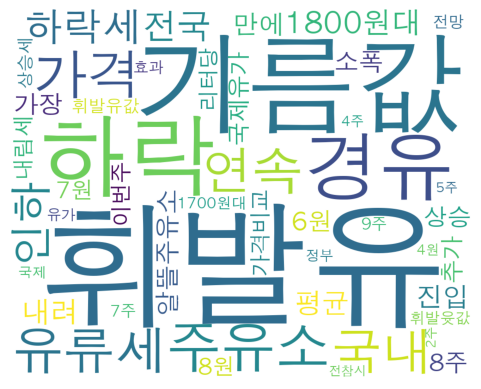

In [251]:
wc = WordCloud(font_path='AppleGothic', stopwords=stopwords, width=1000, height=800,background_color='white')
cloud = wc.generate_from_frequencies(wordscnt)

plt.imshow(cloud)
plt.axis('off')
plt.show()

In [257]:
words = [ ]
for i in data['description']:
    engWords = re.sub(r"[^\uAC00-\uD7A30-9,.]+", " ", str(i))
    engWordsToken = word_tokenize(engWords)
    engWordsTokenStop = [j for j in engWordsToken]
    engWordsTokenStopLemma = [lemma.lemmatize(j) for j in engWordsTokenStop]
    words.append(engWordsTokenStopLemma)
words

[['전국',
  '휘발유',
  '평균',
  '가격이',
  '리터당',
  '1600원대로',
  '떨어진',
  '가운데',
  '4일',
  '오전',
  '서울시',
  '양천구',
  '알뜰주유소',
  '가격표에',
  '휘발유',
  '1',
  '565원',
  '경유',
  '1782원으로',
  '표시돼',
  '있다',
  '.',
  '한국석유공사',
  '유가',
  '정보',
  '사이트',
  '오피넷에',
  '따르면',
  '이날',
  '...'],
 ['휘발유',
  '가격이',
  '가장',
  '싼',
  '주유소는',
  '경북',
  '칠곡군에',
  '위치한',
  '알뜰주유소',
  '상표의',
  '대광셀프주유소가',
  '리터당',
  '1517원에',
  '판매해',
  '가장',
  '저렴했다',
  '.',
  '경유',
  '가격이',
  '가장',
  '싼',
  '주유소는',
  '경남',
  '김해시에',
  '위치한',
  '에너지',
  '상표의',
  '...'],
 ['정부의',
  '지원을',
  '받아',
  '한국석유공사가',
  '석유가격에',
  '대한',
  '소비자',
  '구매부담',
  '경감을',
  '위해',
  '지난',
  '2011년',
  '도입한',
  '알뜰주유소',
  '에서',
  '품질미달',
  '가짜석유',
  '판매',
  '등',
  '석유사업법',
  '위반행위가',
  '여전히',
  '계속되고',
  '있는',
  '것으로',
  '나타났다',
  '....'],
 ['전국에서',
  '휘발유',
  '가격이',
  '제일',
  '낮은',
  '주유소는',
  '경북',
  '칠곡군의',
  '한',
  '알뜰주유소',
  '이며',
  '리터당',
  '1517원이다',
  '.',
  '또',
  '경북',
  '칠곡군의',
  '에너지',
  '주유소',
  '에쓰오일',
  '주유소',
  '가격도',
  '리터당',
  '1518원

In [253]:
wordslist = reduce(lambda x,y : x+y, words)

In [254]:
cnt = Counter(wordslist)
cnt.most_common(100)

[('가장', 993),
 ('알뜰주유소', 978),
 ('평균', 568),
 ('경유', 537),
 ('당', 495),
 ('휘발유', 434),
 ('주유소', 407),
 ('주유소가', 365),
 ('는', 360),
 ('가격은', 351),
 ('국내', 328),
 ('리터당', 314),
 ('상표별로는', 280),
 ('칼텍스', 272),
 ('비쌌고', 264),
 ('저렴했다', 259),
 ('알뜰', 252),
 ('의', 210),
 ('주', 196),
 ('가격이', 182),
 ('있다', 181),
 ('2원으로', 177),
 ('기준', 169),
 ('내린', 167),
 ('지난주보다', 162),
 ('에너지', 160),
 ('유류세', 160),
 ('이번', 146),
 ('한', 144),
 ('가격도', 141),
 ('에서', 130),
 ('서울', 128),
 ('전국', 126),
 ('4원으로', 126),
 ('1원', 126),
 ('가격', 120),
 ('가', 118),
 ('인하', 115),
 ('5원으로', 113),
 ('주유소는', 109),
 ('하락세를', 109),
 ('낮았고', 105),
 ('것으로', 98),
 ('를', 97),
 ('1', 92),
 ('오후', 91),
 ('자영', 87),
 ('6원으로', 85),
 ('등', 82),
 ('싼', 78),
 ('평균가격이', 78),
 ('9원으로', 77),
 ('시민들이', 76),
 ('로', 75),
 ('이어갔다', 73),
 ('한국석유공사', 72),
 ('있는', 71),
 ('집계됐다', 68),
 ('가운데', 67),
 ('높은', 67),
 ('나타났다', 66),
 ('전날', 66),
 ('2022', 65),
 ('1원으로', 65),
 ('판매가격은', 64),
 ('주유소별로는', 63),
 ('가격을', 61),
 ('2', 61),
 ('연속', 61),
 ('중심으

In [255]:
wordscnt = dict()
for tag, counts in cnt.most_common(50):
    if(len(str(tag)) > 1):      # 1글자 이상인 단어만 추출
        wordscnt[tag] = counts

wordscnt

{'가장': 993,
 '알뜰주유소': 978,
 '평균': 568,
 '경유': 537,
 '휘발유': 434,
 '주유소': 407,
 '주유소가': 365,
 '가격은': 351,
 '국내': 328,
 '리터당': 314,
 '상표별로는': 280,
 '칼텍스': 272,
 '비쌌고': 264,
 '저렴했다': 259,
 '알뜰': 252,
 '가격이': 182,
 '있다': 181,
 '2원으로': 177,
 '기준': 169,
 '내린': 167,
 '지난주보다': 162,
 '에너지': 160,
 '유류세': 160,
 '이번': 146,
 '가격도': 141,
 '에서': 130,
 '서울': 128,
 '전국': 126,
 '4원으로': 126,
 '1원': 126,
 '가격': 120,
 '인하': 115,
 '5원으로': 113,
 '주유소는': 109,
 '하락세를': 109,
 '낮았고': 105,
 '것으로': 98,
 '오후': 91,
 '자영': 87,
 '6원으로': 85}

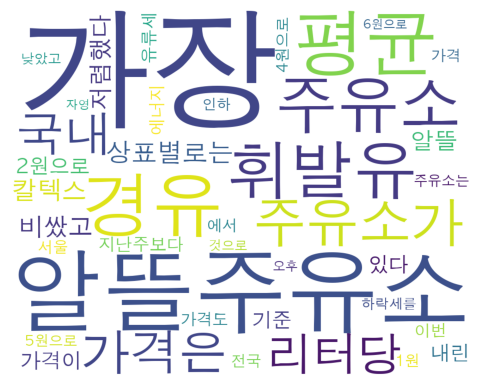

In [256]:
wc = WordCloud(font_path='AppleGothic', stopwords=stopwords, width=1000, height=800,background_color='white')
cloud = wc.generate_from_frequencies(wordscnt)

plt.imshow(cloud)
plt.axis('off')
plt.show()